In [85]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [86]:
import numpy as np
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [87]:
X = np.array([
#    0  1  2  3  4  5  6  7  8
    [0, 1, 1, 0, 0, 1, 1, 0, 0], # 3
    [1, 0, 0, 1, 0, 1, 0, 1, 0], # 4
    [1, 1, 0, 0, 0, 1, 0, 1, 1], # 5
    [1, 1, 1, 1, 1, 1, 1, 1, 1]  # 8
])

In [88]:
y = np.array([
    [1,0,0,0], # 1
    [0,1,0,0], # 2
    [0,0,1,0], # 3
    [0,0,0,1]  # etc
])

In [89]:
def create_model():
    d_model = models.Sequential()

    d_model.add(layers.Input(shape=(9,)))
    d_model.add(layers.Dense(16, activation='relu'))
    d_model.add(layers.Dense(8, activation='relu'))
    d_model.add(layers.Dense(4, activation='softmax'))

    d_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return d_model

In [93]:
target_mse = 0.01
final_loss = 1.0
all_epochs = []
all_mse = []
n_epochs = 100

c_model = create_model()

while final_loss > target_mse:
    history = c_model.fit(X, y, epochs=n_epochs, verbose=0)
    final_loss = history.history['loss'][-1]
    all_epochs.append(n_epochs)
    all_mse.append(final_loss)
    print(f"Epochs: {n_epochs} MSE: {final_loss:.4f}")
    n_epochs += 100

Epochs: 100 MSE: 0.0847
Epochs: 200 MSE: 0.0036
Epochs: 300 MSE: 0.0005


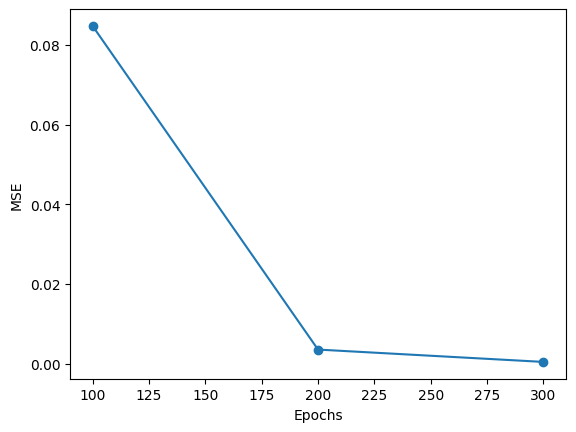

In [96]:
plt.plot(all_epochs, all_mse, marker='o')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [97]:
predictions = c_model.predict(X)

print("Очікувані")
print(y)

print("\nОтримані")
print(np.round(predictions, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Очікувані
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Отримані
[[0.97 0.03 0.01 0.  ]
 [0.01 0.97 0.01 0.02]
 [0.01 0.03 0.96 0.01]
 [0.   0.02 0.   0.98]]
